# EJERCICIOS

## 04 Machine Learning

El objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años basándose en el dataset 'Give me some credit. 

Aplica las técnicas que creas necesarias para obtener el mejor resultado. En este caso se pide optimizar el recall medio, para tener un compromiso entre las dos clases.

Puedes encontrar este dataset en el directorio data que acompaña al ejercicio. 

*A continuación se ofrece una descripción de las variables de este dataset:*

1. **SeriousDlqin2yrs**: Variable dependiente/binaria. Indica si el individuo experimentó morosidad de 90 días o más en los próximos dos años al momento de la toma de datos. Un valor de 1 indica que sí experimentó dificultades financieras serias, y 0 en caso contrario.

2. **RevolvingUtilizationOfUnsecuredLines**: Proporción del crédito utilizado por el consumidor en relación con todas sus líneas de crédito disponibles sin garantía (como tarjetas de crédito).

3. **age**: Edad del prestatario en años.

4. **NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el prestatario ha estado retrasado entre 30 y 59 días en sus pagos, pero no peor en los últimos 2 años.

5. **DebtRatio**: Relación deuda/ingreso. Es una medida de la carga de deuda del prestatario, calculada como sus pagos mensuales de deuda divididos por su ingreso mensual.

6. **MonthlyIncome**: Ingreso mensual del prestatario.

7. **NumberOfOpenCreditLinesAndLoans**: Número de préstamos abiertos y líneas de crédito (como préstamos para automóviles, hipotecas, préstamos personales, etc.).

8. **NumberOfTimes90DaysLate**: Número de veces que el prestatario ha estado retrasado más de 90 días en sus pagos.

9. **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito inmobiliarios, incluyendo hipotecas y líneas de crédito con garantía hipotecaria.

10. **NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el prestatario ha estado retrasado entre 60 y 89 días en sus pagos, pero no peor en los últimos 2 años.

11. **NumberOfDependents**: Número de dependientes que el prestatario tiene en su familia, excluyéndose a sí mismo.

### A) Explica la solución que se presenta a continuación

### B) Cuál sería la configuración adecuada de tu modelo si nos dicen de gestión que los valores para el True Positive Rate es de +2 y el de False Positive Rate es de -1. Calcula la Matriz de Confusión correspondiente a esta nueva configuración e interprétala.

-----------------------------------------------------------------------------------------------------------------------------------------

In [204]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Toolbox_ML import *
#from univariante import *

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

import bootcampviztools as bt



In [92]:
df = pd.read_csv("./data/credit_npo.csv")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [94]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [95]:
describe_df(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Tipos,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,5.75,0.0,0.0,0.0,0.0,1.41
Valores Únicos,2,10764,78,10,11547,4167,43,13,16,8,10
% Cardinalidad,0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


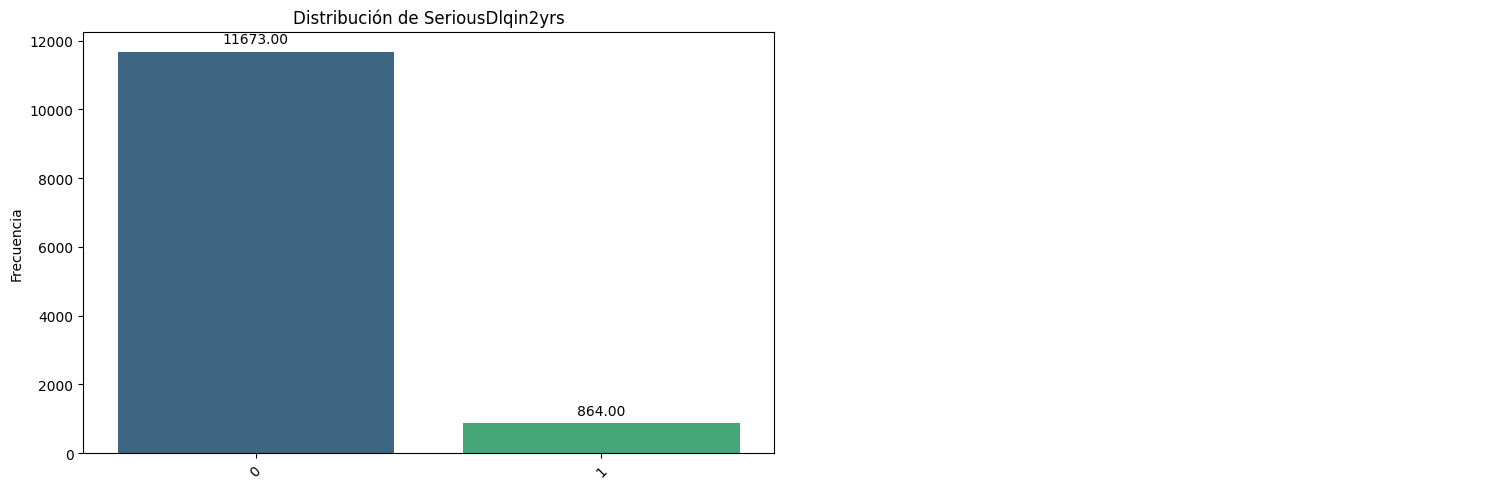

In [96]:
target = "SeriousDlqin2yrs"

bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)


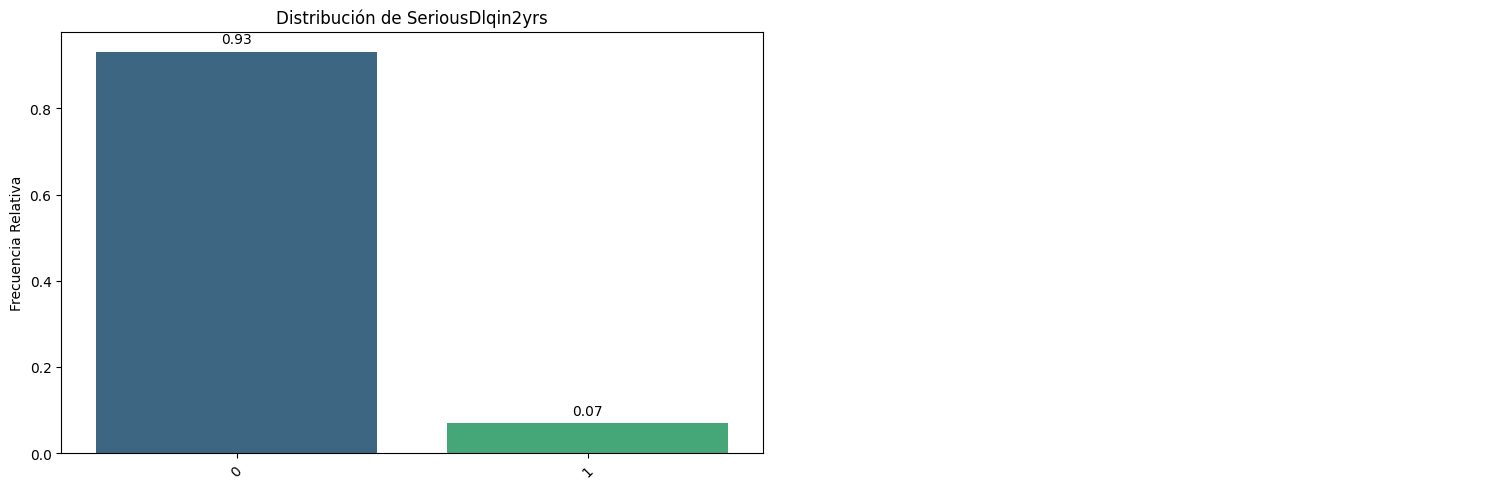

In [165]:
bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True, relativa= True)


In [166]:
0.93 / 0.07

13.285714285714285

In [97]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [98]:
train_set_back = train_set.copy()
train_set = train_set.dropna()
test_set_back = test_set.copy()
test_set = test_set.dropna()


In [99]:
# Primero las asigno a variables para simplificar el tecleteo :-)
ndp = "NumberOfDependents"
mi = "MonthlyIncome"
train_set[ndp]=train_set[ndp].dropna()
test_set[ndp]=test_set[ndp].dropna()
train_set[mi]=train_set[mi].dropna()
test_set[mi]=test_set[mi].dropna()
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9458 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9458 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9458 non-null   float64
 2   age                                   9458 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9458 non-null   int64  
 4   DebtRatio                             9458 non-null   float64
 5   MonthlyIncome                         9458 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9458 non-null   int64  
 7   NumberOfTimes90DaysLate               9458 non-null   int64  
 8   NumberRealEstateLoansOrLines          9458 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9458 non-null   int64  
 10  NumberOfDependents                    9458 non-null   float64
dtypes: float64(4), int6

(2,)


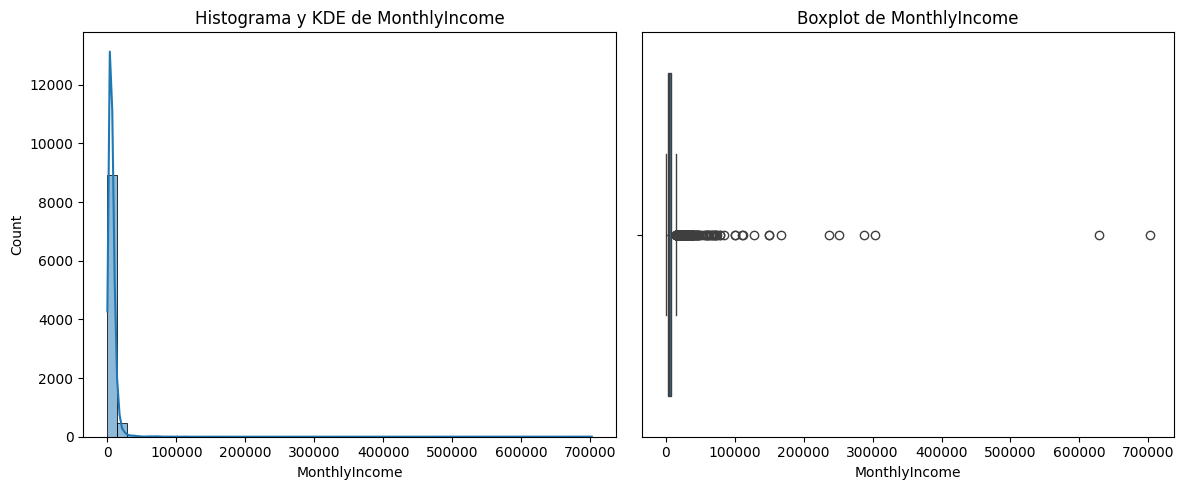

In [102]:
bt.plot_combined_graphs(train_set, columns=[mi], bins = 50) 

In [104]:
np.mean(df['MonthlyIncome'])

6864.815419769804

In [105]:
np.median(df['MonthlyIncome'].dropna())

5416.0

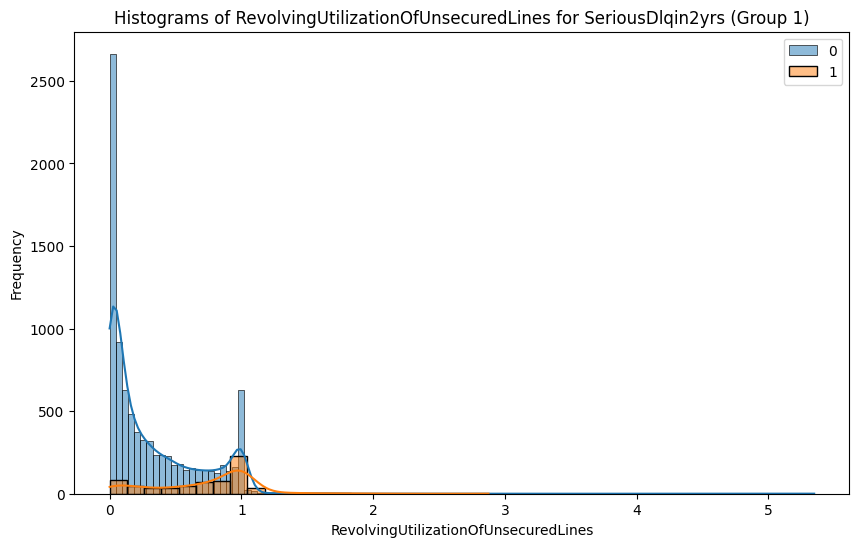

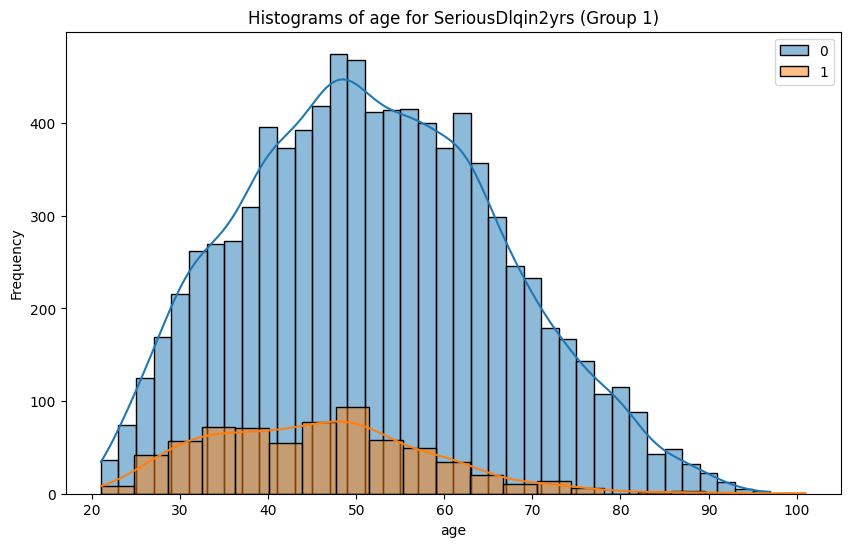

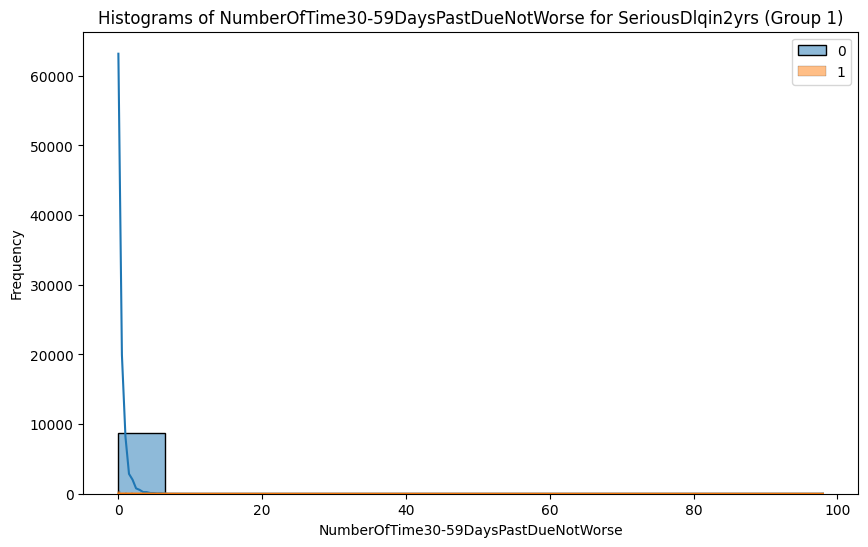

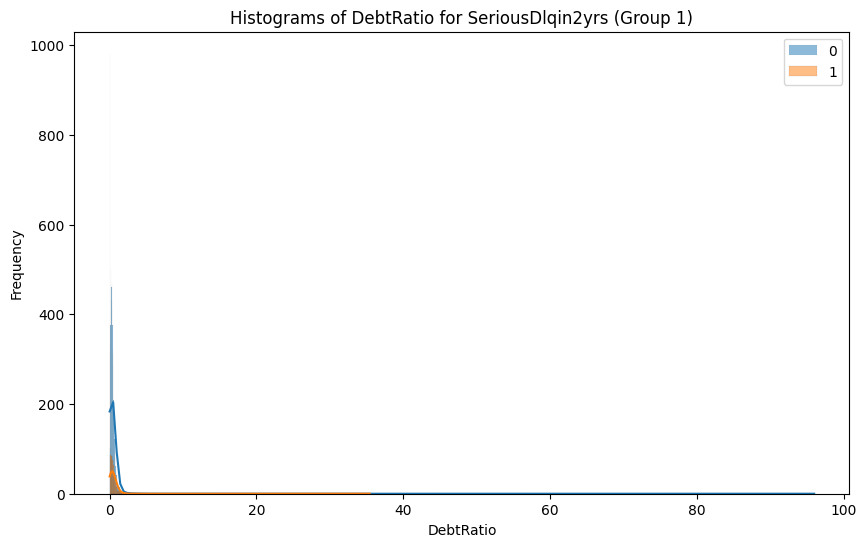

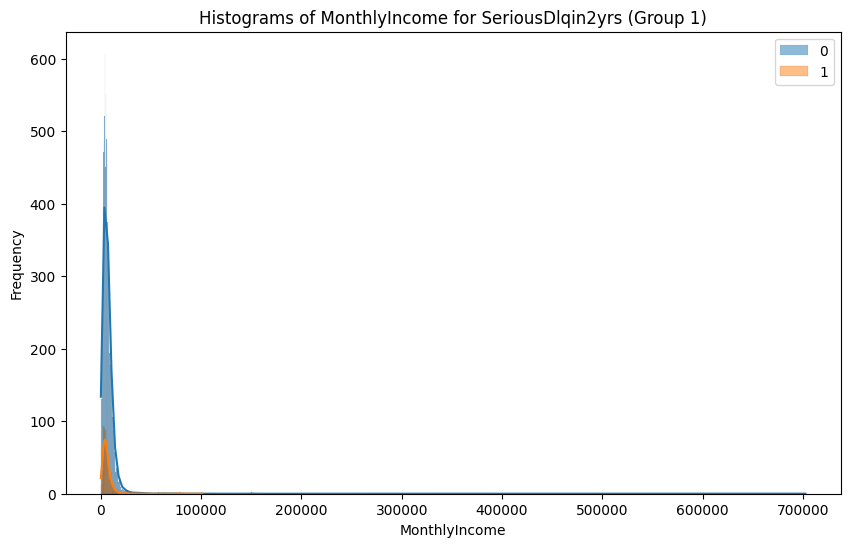

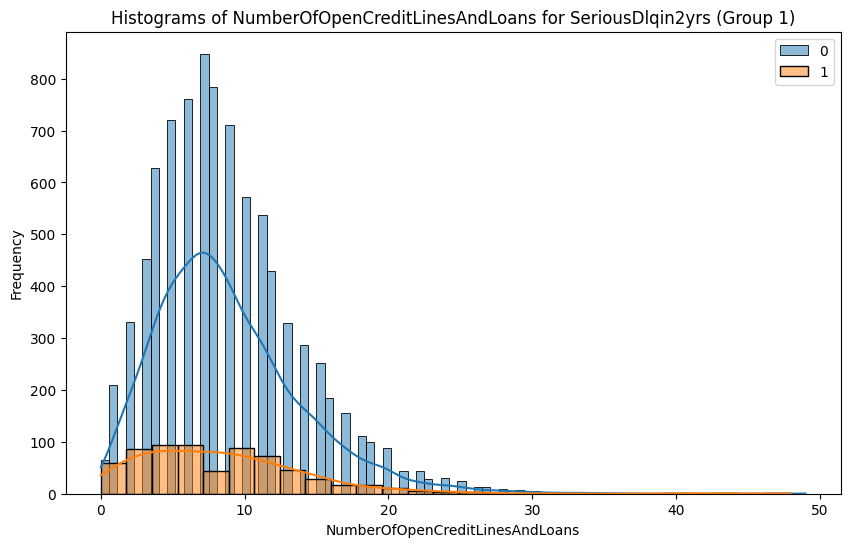

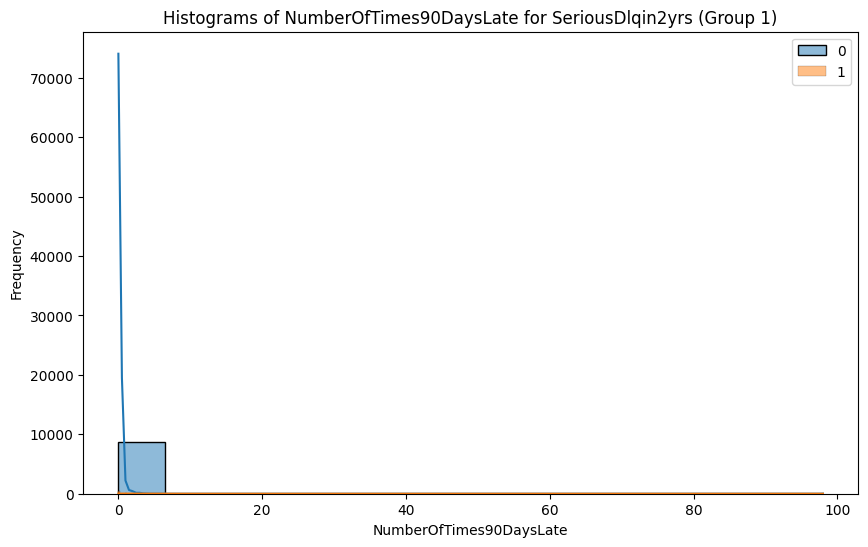

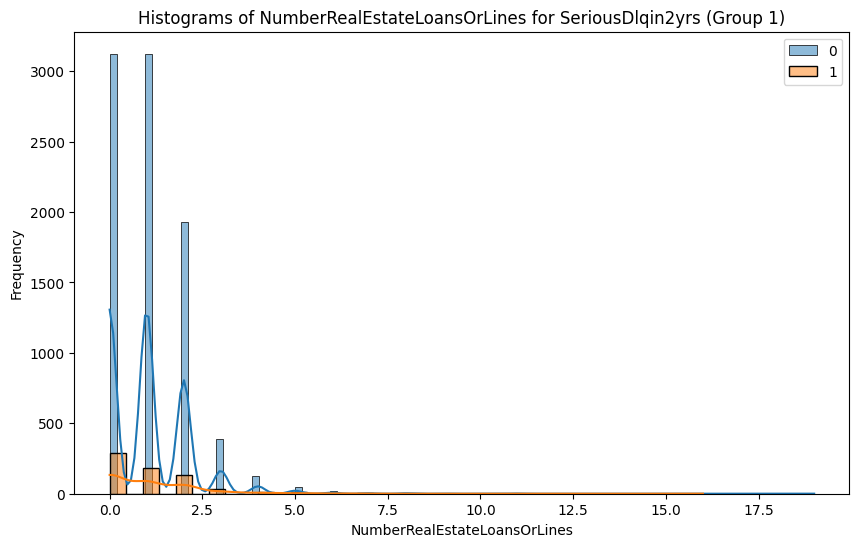

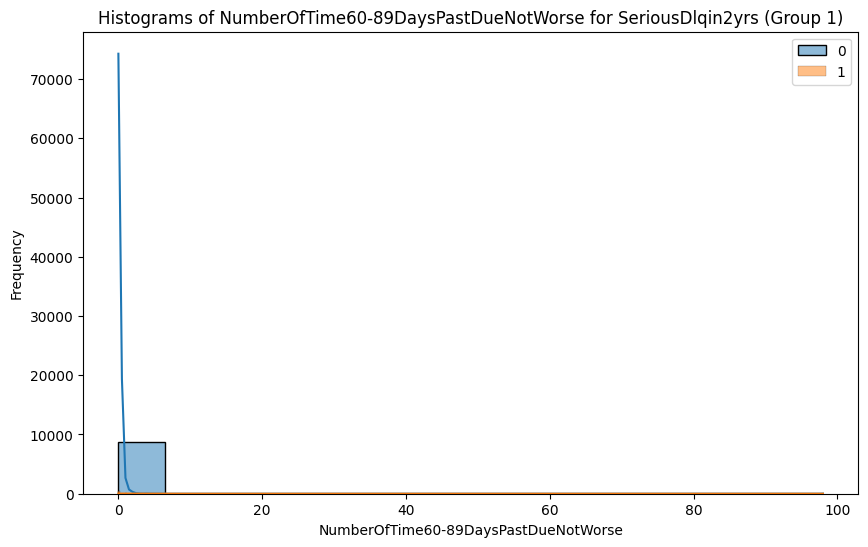

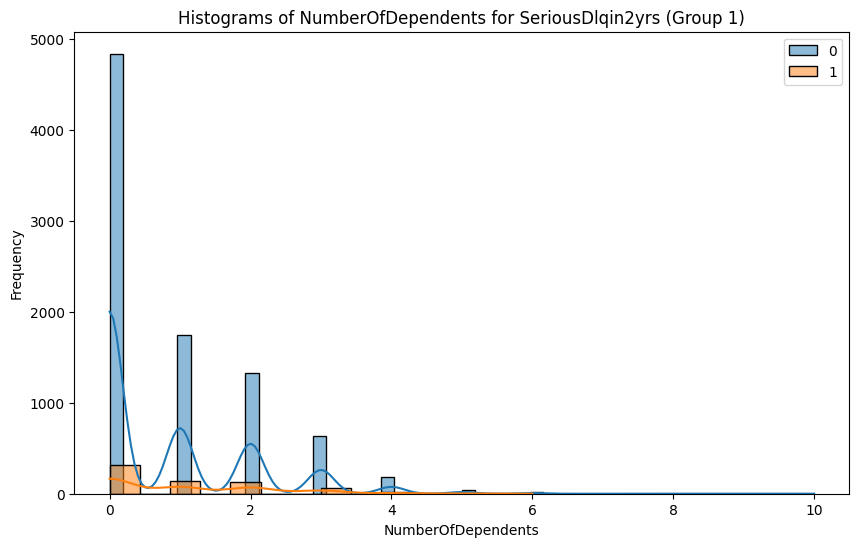

In [109]:
features = [col for col in train_set.columns if col != target]
for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

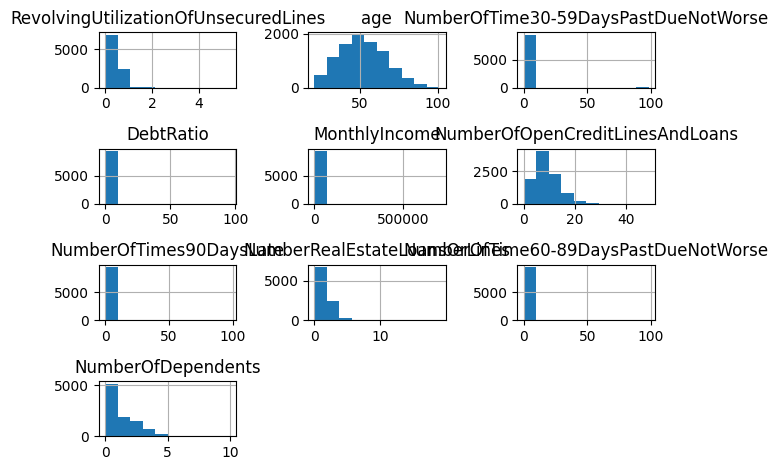

In [111]:
train_set[features].hist()
plt.tight_layout()

In [112]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [113]:
for col in features:
    if col != "age":
        train_set_scaled[col] = np.log(train_set_scaled[col] + 1) # A todas les aplicafo log(x+1) porque tienen ceros
        test_set_scaled[col] = np.log(test_set_scaled[col] + 1) # A test le tengo que aplicar las mismas transformaciones que a train

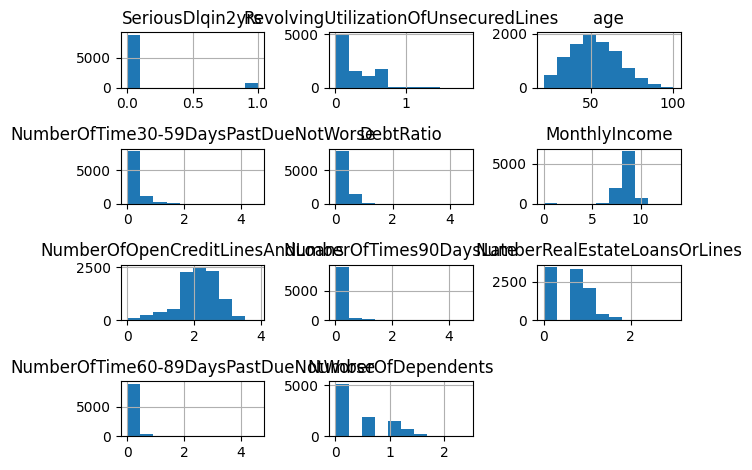

In [114]:
train_set_scaled.hist()
plt.tight_layout()

<Axes: >

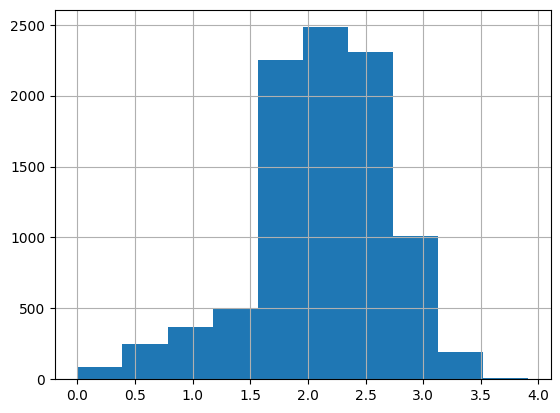

In [115]:
train_set_scaled.NumberOfOpenCreditLinesAndLoans.hist()

In [116]:
scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

In [117]:
X_train = train_set[features]
X_train_scaled = train_set_scaled[features]
y_train = train_set[target]

X_test = test_set[features]
X_test_scaled = test_set_scaled[features]
y_test = test_set[target]


**Baseline con KKN**

In [118]:
knn_clf = KNeighborsClassifier(n_neighbors= 7)



In [119]:
knn_clf.fit(X_train_scaled, y_train)
print(classification_report(y_train, knn_clf.predict(X_train_scaled)))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8784
           1       0.68      0.26      0.38       674

    accuracy                           0.94      9458
   macro avg       0.81      0.63      0.67      9458
weighted avg       0.93      0.94      0.93      9458



**Otros Modelos y comparativa**

In [120]:
modelos = ["KNN","Logistic","RandomF","XGBoost","LightGBM","CatBoost"]
metricas = []
lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100, random_state = 42)

for nombre,modelo in zip(modelos,[knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf,cat_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")).round(2)
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")).round(2)
        #metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

Para KNN: 0.59
Para Logistic: 0.58
Para RandomF: 0.56
Para XGBoost: 0.59
Para LightGBM: 0.59
Para CatBoost: 0.59


**Equilibrado**

In [122]:
X_train.shape

(9458, 10)

1. Oversampling con SMOTE

In [123]:
smote = SMOTE(random_state=42,sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(X_train_scaled, y_train) 


In [124]:
y_train_smote.value_counts()

SeriousDlqin2yrs
0    8784
1    8784
Name: count, dtype: int64

In [125]:
modelos = ["KNN","Logistic","RandomF","XGBoost","LightGBM"]
metricas = []
lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100, random_state = 42)
model = []

for nombre,modelo in zip(modelos,[knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]):
    model.append(modelo)
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_smote, y_train_smote, cv = 5, scoring = "balanced_accuracy")).round(2)
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_smote_scaled, y_train_smote_scaled, cv = 5, scoring = "balanced_accuracy")).round(2)
        #metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

Para KNN: 0.89
Para Logistic: 0.78
Para RandomF: 0.81
Para XGBoost: 0.91
Para LightGBM: 0.9


**Hiper-parámetro de entrenamiento "balanced"**

In [136]:
modelos = ["KNN","Logistic","RandomF","XGBoost","LightGBM"]
metricas = []
knn_clf = KNeighborsClassifier(n_neighbors= 7, weights= "distance")
lr_clf = LogisticRegression(max_iter = 10000, class_weight= "balanced")
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42, class_weight= "balanced")
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42, scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[target] == 1))
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100, random_state = 42, class_weight= "balanced")

for nombre,modelo in zip(modelos,[knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")).round(2)
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")).round(2)
        #metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

Para KNN: 0.59
Para Logistic: 0.77
Para RandomF: 0.76
Para XGBoost: 0.59
Para LightGBM: 0.75


In [137]:
### LightGBM

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1],#,0.5,1],
    "max_depth": [5],#,10,15],
    "min_data_in_leaf": [20,100],
    "class_weight":["balanced"]#,
 #   "feature_fraction":[0.2,0.4,0.6]
}

lgb_clf = LGBMClassifier(verbose = -100)
lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

lgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100),
             param_grid={'class_weight': ['balanced'], 'learning_rate': [0.1],
                         'max_depth': [5], 'min_data_in_leaf': [20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [138]:
### LightGBM

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1],#,0.5,1],
    "max_depth": [5],#,10,15],
    "min_data_in_leaf": [20,100],
    "class_weight":["balanced"]#,
 #   "feature_fraction":[0.2,0.4,0.6]
}

lgb_clf = LGBMClassifier(verbose = -100)
lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

lgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100),
             param_grid={'class_weight': ['balanced'], 'learning_rate': [0.1],
                         'max_depth': [5], 'min_data_in_leaf': [20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [139]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [140]:
lgb_grid.best_score_

0.7652045475830356

In [146]:
print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2202
           1       0.23      0.70      0.34       156

    accuracy                           0.82      2358
   macro avg       0.60      0.76      0.62      2358
weighted avg       0.93      0.82      0.86      2358



**Test para SMOTE**

In [148]:
### LightGBM con SMOTE

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100]
}

lgb_clf = LGBMClassifier(verbose = -100)
lgb_grid_smote = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

lgb_grid_smote.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [149]:
lgb_grid_smote.best_params_

{'learning_rate': 0.5,
 'max_depth': 15,
 'min_data_in_leaf': 10,
 'n_estimators': 200}

In [150]:
lgb_grid_smote.best_score_

0.9390950354131796

In [151]:
print(classification_report(y_test, lgb_grid_smote.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2202
           1       0.30      0.31      0.30       156

    accuracy                           0.91      2358
   macro avg       0.62      0.63      0.63      2358
weighted avg       0.91      0.91      0.91      2358



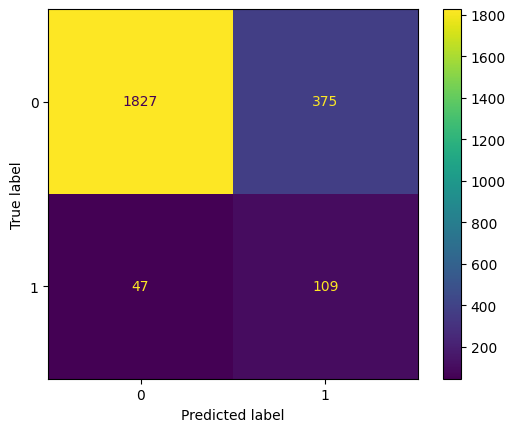

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_grid.best_estimator_.predict(X_test))

In [154]:
print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2202
           1       0.23      0.70      0.34       156

    accuracy                           0.82      2358
   macro avg       0.60      0.76      0.62      2358
weighted avg       0.93      0.82      0.86      2358



_______________________________________________________________________________________________________________________________

### Parte B

AUROC: 0.84


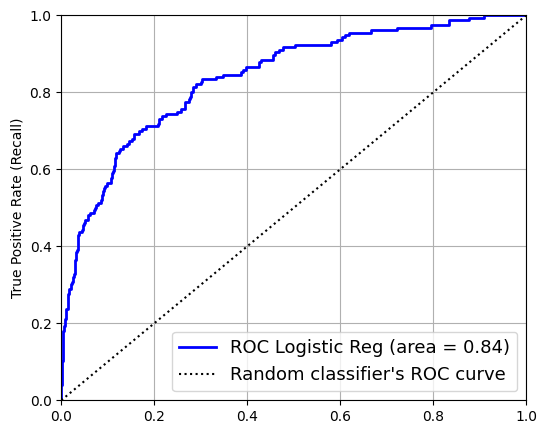

In [155]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = lgb_grid.best_estimator_.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

In [167]:
print(scores)

[[0.92082529 0.07917471]
 [0.54044283 0.45955717]
 [0.72955783 0.27044217]
 ...
 [0.30756561 0.69243439]
 [0.47301614 0.52698386]
 [0.96285644 0.03714356]]


In [200]:
thresholds = np.arange(0.0, 1.1, 0.1)

# Initialize lists to store TPR, FPR, and net value for each threshold
tpr_list = []
fpr_list = []
TP_list = []
FP_list = []
TN_list = []
FN_list = []
net_value_list = []

# Calculate TPR, FPR, and net value at each threshold
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred = (y_scores >= threshold).astype(int)

    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))
    TN = np.sum((y_pred == 0) & (y_test == 0))
    FN = np.sum((y_pred == 0) & (y_test == 1))
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Sensitivity (Recall)
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
    
    # Calculate the net value using the provided weights
    net_value = (TPR * 2) + (FPR * -1)
    
    # Append metrics to the lists
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    TP_list.append(TP)
    FP_list.append(FP)
    TN_list.append(TN)
    FN_list.append(FN)
    net_value_list.append(net_value)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'TPR': tpr_list,
    'FPR': fpr_list,
    'TP': TP_list,
    'FP': FP_list,
    'TN': TN_list,
    'FN' : FN_list,
    'Net Value': net_value_list
})

# Find the optimal threshold (the one with the maximum net value)
optimal_threshold_index = np.argmax(net_value_list)
optimal_threshold = thresholds[optimal_threshold_index]

# Print the results
print("Results DataFrame:")
print(results_df.head(30))
print(f"\nOptimal Threshold: {optimal_threshold:.2f} with a net value of {net_value_list[optimal_threshold_index]:.2f}")

Results DataFrame:
    Threshold       TPR       FPR   TP    FP    TN   FN  Net Value
0         0.0  1.000000  1.000000  156  2202     0    0   1.000000
1         0.1  0.955128  0.658038  149  1449   753    7   1.252218
2         0.2  0.884615  0.454133  138  1000  1202   18   1.315098
3         0.3  0.833333  0.320163  130   705  1497   26   1.346503
4         0.4  0.743590  0.240690  116   530  1672   40   1.246489
5         0.5  0.698718  0.170300  109   375  1827   47   1.227136
6         0.6  0.602564  0.113533   94   250  1952   62   1.091595
7         0.7  0.506410  0.078111   79   172  2030   77   0.934710
8         0.8  0.435897  0.040418   68    89  2113   88   0.831377
9         0.9  0.269231  0.014986   42    33  2169  114   0.523475
10        1.0  0.000000  0.000000    0     0  2202  156   0.000000

Optimal Threshold: 0.30 with a net value of 1.35


Confusion Matrix:
[[1497  705]
 [  26  130]]


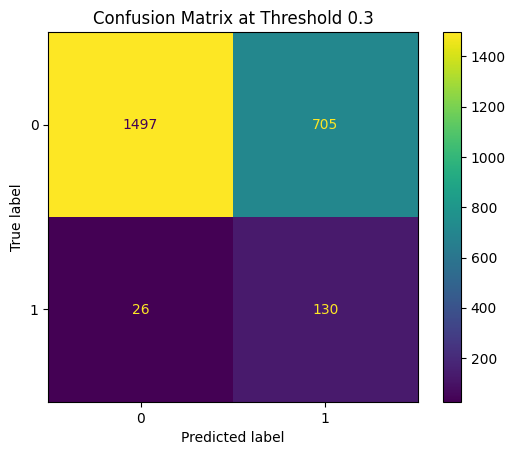

In [208]:
# Get predicted probabilities for the positive class
#yy_scores = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
scores = lgb_grid.best_estimator_.predict_proba(X_test)[:,1]

# Define the threshold
threshold = 0.3

# Classify based on the threshold
y_pred = (scores >= threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# If you want to visualize the confusion matrix:
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix at Threshold 0.3")
plt.show()

In [172]:
np.shape(scores)

(2358, 2)

    Threshold  Precision    Recall
0         0.0   0.066158  1.000000
1         0.1   0.093242  0.955128
2         0.2   0.121265  0.884615
3         0.3   0.155689  0.833333
4         0.4   0.179567  0.743590
5         0.5   0.225207  0.698718
6         0.6   0.273256  0.602564
7         0.7   0.314741  0.506410
8         0.8   0.433121  0.435897
9         0.9   0.560000  0.269231
10        1.0   0.000000  0.000000


C:\Users\34632\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


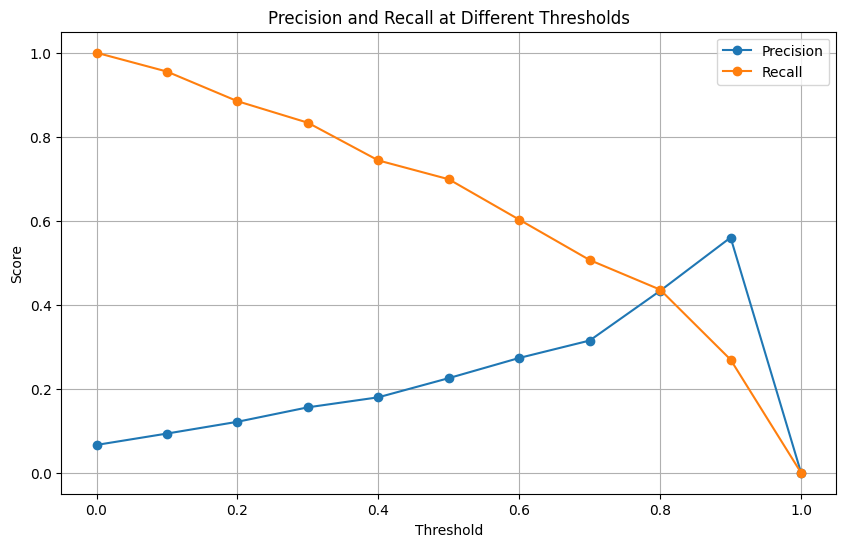

In [173]:
y_scores = scores[:,1]
# Define probabilities thresholds to evaluate
thresholds = np.arange(0.0, 1.1, 0.1)

# Initialize lists to store precision and recall for each threshold
precision_list = []
recall_list = []

# Calculate precision and recall at each threshold
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate precision and recall for the current threshold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    precision_list.append(precision)
    recall_list.append(recall)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_list,
    'Recall': recall_list
})

# Print the resulting DataFrame
print(results_df)

# Plot Precision and Recall against Thresholds
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], marker='o', label='Recall')
plt.title('Precision and Recall at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

    Threshold  Precision    Recall  Correct Classifications
0         0.0   0.066158  1.000000                      156
1         0.1   0.093242  0.955128                      902
2         0.2   0.121265  0.884615                     1340
3         0.3   0.155689  0.833333                     1627
4         0.4   0.179567  0.743590                     1788
5         0.5   0.225207  0.698718                     1936
6         0.6   0.273256  0.602564                     2046
7         0.7   0.314741  0.506410                     2109
8         0.8   0.433121  0.435897                     2181
9         0.9   0.560000  0.269231                     2211
10        1.0   0.000000  0.000000                     2202


C:\Users\34632\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


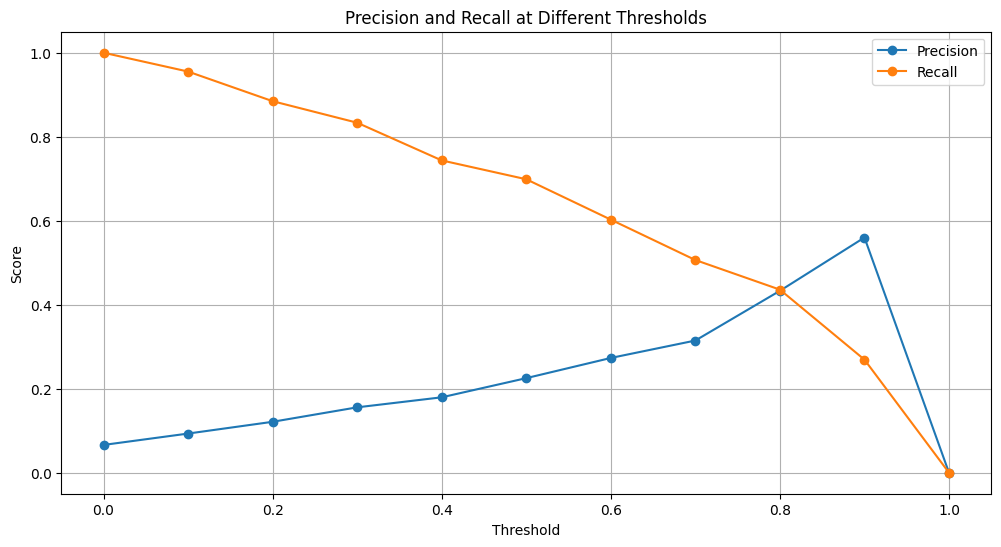

In [174]:
# Initialize lists to store precision, recall, and correct classifications for each threshold
precision_list = []
recall_list = []
correct_classifications_count_list = []

# Calculate precision, recall, and correct classifications at each threshold
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate precision and recall for the current threshold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Count the number of correctly classified instances
    correct_classifications_count = np.sum(y_pred == y_test)

    precision_list.append(precision)
    recall_list.append(recall)
    correct_classifications_count_list.append(correct_classifications_count)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_list,
    'Recall': recall_list,
    'Correct Classifications': correct_classifications_count_list
})

# Print the resulting DataFrame
print(results_df)

# Plot Precision and Recall against Thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], marker='o', label='Recall')
plt.title('Precision and Recall at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

    Threshold  Correct Classifications  Incorrect Classifications
0         0.0                      156                       2202
1         0.1                      902                       1456
2         0.2                     1340                       1018
3         0.3                     1627                        731
4         0.4                     1788                        570
5         0.5                     1936                        422
6         0.6                     2046                        312
7         0.7                     2109                        249
8         0.8                     2181                        177
9         0.9                     2211                        147
10        1.0                     2202                        156


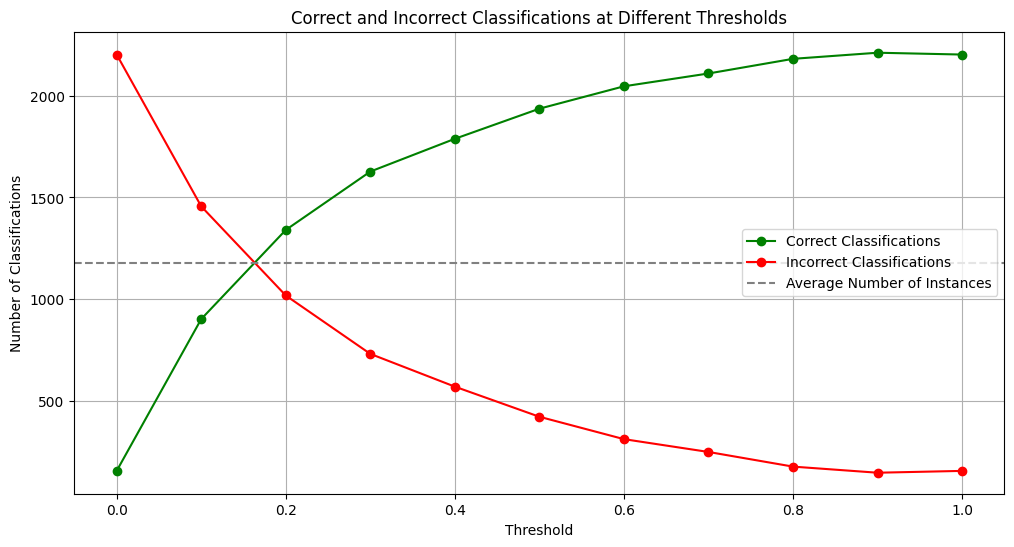

In [175]:
# Initialize lists to store correct and incorrect classifications for each threshold
correct_classifications_count_list = []
incorrect_classifications_count_list = []

# Calculate correct and incorrect classifications at each threshold
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred = (y_scores >= threshold).astype(int)
    
    # Count the number of correctly classified instances
    correct_classifications_count = np.sum(y_pred == y_test)
    
    # Count the number of incorrectly classified instances
    incorrect_classifications_count = np.sum(y_pred != y_test)

    correct_classifications_count_list.append(correct_classifications_count)
    incorrect_classifications_count_list.append(incorrect_classifications_count)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Correct Classifications': correct_classifications_count_list,
    'Incorrect Classifications': incorrect_classifications_count_list
})

# Print the resulting DataFrame
print(results_df)

# Plot Correct and Incorrect Classifications against Thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['Threshold'], results_df['Correct Classifications'], marker='o', label='Correct Classifications', color='green')
plt.plot(results_df['Threshold'], results_df['Incorrect Classifications'], marker='o', label='Incorrect Classifications', color='red')
plt.title('Correct and Incorrect Classifications at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Number of Classifications')
plt.axhline(y=len(y_test) / 2, color='gray', linestyle='--', label='Average Number of Instances')
plt.legend()
plt.grid()
plt.show()